<p style="text-align:center"><img src="Julia.jpg" width="350" ></p>

# Números random o aleatorios

## Números al azar

La generación de números aleatorios en `Julia` usa el algoritmo `Xoshiro256 ++` por defecto. Se pueden conectar otros tipos de `RNG` heredando el tipo `AbstractRNG`; luego se pueden usar para obtener múltiples flujos de números aleatorios.  
https://runebook.dev/es/docs/julia/stdlib/random/index

Veamos un ejemplo de uso

In [1]:
x = rand(4)   # Calculamos 4 números aleatorios
print(x)

[0.8149158327617558, 0.03321893197834691, 0.09180757573083764, 0.9959066210003549]

-----------------------------------------------
Podemos generar un vector de d dimensiones con números random

In [2]:
"""
 Aqui definimos la funcion SumAleatorios(d, N)
cuyos argumentos son d (dimension) y N (cantidaad de números aleatorios que sumaremos).
Contruiremos vectores de d dimensiones, y les calcularemos la norma, o la norma al cuadrado
"""

function SumAleatorios(d, N)
    dim = zeros( 1, d)
    for i = 1 : N
        for j = 1 : 3
            dim[j] = rand()
        end
"""        
    No es práctico colocar `print` dentro de las funciones, lo hacemos de modo ejemplo
"""        
        println("abs2 :",sum(abs2, dim)) # Absoluto al Cuadrado
        # Esta funcion toma el valor de dim, le calcula el abs2 y lo suma
        # es decir, le calcula la norma al vector de d dimensiones
#        println("abs  :",sum(abs, dim)) # Absoluto
    end
    return sum(dim)
end

SumAleatorios (generic function with 1 method)

In [3]:
SumAleatorios(3, 4)

abs2 :2.0228874323668338
abs2 :0.6179702709372901
abs2 :0.5409116653276267
abs2 :0.6604484559130688


1.0428724025171134

# Computo de $\pi$ por el Método Monte Carlo 

La idea de poder calcular $\pi$ resulta de estimar el área de un círculo, pues, como sabemos, el área de un círculo es $\pi \times R^2$, luego, si dividimos por $R^2$ obtendríamos el valor de $\pi$.

Por otro lado, si calculamos el área de un cuadrado cuyo lado es $2 \times R$, podríamos usarlo para cancelar $R^2$.

<p style="text-align:center"><img src="mc_pi3.jpg" width="300" ></p>

Una posibilidad sería contar los cuadraditos que están dentro del círculo y lo que están todos, y con ellos determinar el área del círculo y del cuadrado.  
Otra forma sería elegir de manera aleatoria algunos de los cuadraditos y contabilizar con ellos.

El uso del método de `Monte Carlo` para aproximar el valor de $\pi$ consiste en dibujar un cuadrado, y dentro de ese cuadrado, dibujar un círculo con diámetro de igual medida que uno de los lados del cuadrado.  
Luego se dibujan puntos de manera aleatoria sobre la superficie dibujada.

<p style="text-align:center"><img src="mc_pi1.jpg" width="300" ></p>

tambien podemos pensar en un cuarto de círculo y luego multiplicar por 4

<p style="text-align:center"><img src="mc_pi2.jpg" width="300" ></p>

Entonces implementemos la idea   
1. Generemos `N` puntos dentro de un cuadrado de lado dos, por lo que el área del cuadrado será 4 (esto es 2 x 2). Dado que todos los `N` puntos están dentro del cuadrado, el número `N` representa o es proporcional al área del cuadrado,
2. Contabilicemos los puntos que cáen dentro del círculo con la variable `n_in_circle`,
3. Dividimos `n_in_circle` por `N` y nos dará la relación del área del círculo respecto del área del cuadrado, así tendremos $$\frac{\pi \times R^2}{4 \times R^2}$$ además podemos considerar $R = 1$ para nuestro caso,
4. Al resultado lo multiplicamos por 4 y obtenemos $\pi$.
> recordar que el área del círulo es $\pi \times R^2$, y   
> del cuadrado de lado $2 \times R$ el área es $4 \times R^2$.

In [4]:
function compute_pi(N::Int)
    """
    Compute pi with a Monte Carlo simulation of N darts thrown in [-1,1]^2
    Returns estimate of pi
    """
    n_in_circle = 0  # counts number of points that have radial coordinate < 1, i.e. in circle
    
    for i = 1:N
        x = rand() * 2 - 1  # uniformly distributed number on x-axis
        y = rand() * 2 - 1  # uniformly distributed number on y-axis
        
        # The rand() function generates a random number between [0, 1]
        # rand() * 2 generates a random number between [0, 2]
        # (rand() * 2 -1 ) generates a random number between [-1, 1]       

        r2 = x*x + y*y  # radius squared, in radial coordinates
        if r2 < 1.0     # in our case the radius is one
            n_in_circle += 1  # if it is inside the circle, we add one
        end
    end

    return n_in_circle / N * 4.0    # final calculation
end

compute_pi (generic function with 1 method)

In [5]:
@time compute_pi(100000000)   # cumputemos pi y veamos cuanto demora

  1.187117 seconds


3.14162612

El valor de $pi$ aproximado es ...
$\pi = 3.141 592 653 589 793 ...$

## Integral por el método Monte Carlo

----------------
Definamos la función a integrar, por ejemplo la `función cuadrado`

In [6]:
function cuadrado(x::Real)
    """
    Definición de la Función cuadrado
    """
    return x*x
end

cuadrado (generic function with 1 method)

probemos si funciona

In [7]:
print(cuadrado(3))

9

--------------------
Definamos otra función simple para integrar

In [8]:
function cte(x::Real)
    """
    Definición de la Función Constante igual a 3.0
    """
    return 3.0
end

cte (generic function with 1 method)

In [9]:
print(cte(0))

3.0

--------------------------
Grafiquemos las funciones

In [10]:
using Plots # Llammamos la libreria Plots

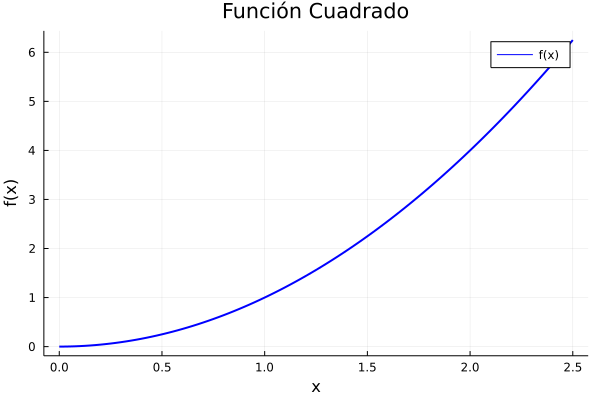

In [11]:
x_min = 0
x_max = 2.5
x = collect(x_min:(x_max-x_min)/100:x_max)
y = cuadrado.(x)
z = cte.(x)

plt_funcion = plot(x,y, xlabel="x", ylabel="f(x)", title = "Función Cuadrado", labels="f(x)",
               color="blue", legend=true, linewidth = 2, grid = true)
display(plt_funcion)

Importante!! De este gráfico sacaremos los límites del grafico, x0, x1, y0, y1
con y0 = f(x0) e y1 = f(x1)
-----------------------------
Para el caso de la Función cuadrada tendríamos:

In [12]:
x0 = x_min # x_min = 0  
x1 = x_max # x_max = 2.5
#y0 = -cuadrado(x_max)
y0 = 0.0 #-17.5 # estimado desde el gráfico o calculado para este caso como f(x1)
y1 = 6.5 # estimado del gráfico o calculado para este caso como f(2.5) = 6.25, 
    #pero preferimos poner un poco más, veremos que no molesta, perdemos un poco de precisión

6.5

In [13]:
function integral(x0, x1, y0, y1::Real, N::Integer)
    """
    Aqui definimos la Función Integral
    -------
    """
    #x = LinRange(a, b, N)
    
    n_landed_in = 0  # counts number of points that have radial coordinate < 1, i.e. in circle

    for i = 1:N
#        x = rand() * 2 - 1  # uniformly distributed number on x-axis
#        y = rand() * 2 - 1  # uniformly distributed number on y-axis
        x = rand() * (x1 - x0) + x0 # x0 y x1 son los límites de integración
        y = rand() * (y1 - y0) + y0 
#        println(x)
#        println(y)
        yy = cuadrado(x)
#        yy = cte(x)
#        r2 = x*x + y*y  # radius squared, in radial coordinates
        if y < yy
            n_landed_in += 1
        end
    end
    return n_landed_in / N * (x1-x0) * (y1-y0) 
end

integral (generic function with 1 method)

In [14]:
integral(x0, x1, y0, y1, 40000000)

5.2086198125

¿Qué sucede si cambio el valor de y1?

In [15]:
x0 = x_min # x_min = 0  
x1 = x_max # x_max = 2.5
y0 = 0.0 #-17.5 # estimado desde el gráfico o calculado para este caso como f(x1)
y1 = 9.0 # estimado del gráfico o calculado para este caso como f(0)y1 = -10.0
integral(x0, x1, y0, y1, 40000000)

5.2086971250000005

In [16]:
x0 = 0.0 #x_min # -4
x1 = 2.5 #x_max # 10
#y0 = -cuadrado(x_max)
y0 = 0.0 #-17.5 # estimado desde el gráfico o calculado para este caso como f(x1)
y1 = 8.0 # estimado del gráfico o calculado para este caso como f(0)
integral(x0, x1, y0, y1, 40000000)

5.21103

A los efectos de comparar, integremos la función cuadrada y la valuemos en el intervalo de interés

In [17]:
function integrada(x0, x1::Real)
    return 1.0/3.0 * (x1^3 - x0^3)
end

integrada (generic function with 1 method)

In [18]:
integrada(x0, x1)

5.208333333333333

Ahora modificaremos la Función Integral, para Integrar la función constante cte(x)

In [19]:
function integral(x0, x1, y0, y1::Real, N::Integer)
    """
    Aqui definimos la Función Integral
    -------
    """
    #x = LinRange(a, b, N)
    
    n_landed_in = 0  # counts number of points that have radial coordinate < 1, i.e. in circle

    for i = 1:N
#        x = rand() * 2 - 1  # uniformly distributed number on x-axis
#        y = rand() * 2 - 1  # uniformly distributed number on y-axis
        x = rand() * (x1 - x0) + x0 # x0 y x1 son los límites de integración
        y = rand() * (y1 - y0) + y0 
#        println(x)
#        println(y)
        """
        Solamente cmabio aquí!
        """
#        yy = cuadrado(x)  
        yy = cte(x)
#        r2 = x*x + y*y  # radius squared, in radial coordinates
        if y < yy
            n_landed_in += 1
        end
    end
    return n_landed_in / N * (x1-x0) * (y1-y0) 
end

integral (generic function with 1 method)

In [20]:
integral(0, 5, 0, 4, 40000000)

15.000346

In [21]:
integral(0, 5, 0, 8, 40000000)

14.997571999999998

Valor esperado!!